## Exemples de machine learning : projet Seedbank

Pour voir des exemples de bout en bout des analyses interactives de machine learning rendues possibles par Colaboratory, découvrez le projet <a href="https://research.google.com/seedbank/">Seedbank</a>.

Voici quelques exemples :

- <a href="https://research.google.com/seedbank/seed/neural_style_transfer_with_tfkeras">Transfert de style neuronal</a> : utiliser le deep learning pour transférer un style d'une image à une autre.
- <a href="https://research.google.com/seedbank/seed/ez_nsynth">EZ NSynth</a> : synthétiser des sons avec les auto-encodeurs WaveNet.
- <a href="https://research.google.com/seedbank/seed/fashion_mnist_with_keras_and_tpus">Fashion MNIST avec Keras et TPU</a> : classer des images liées à la mode en utilisant le deep learning.
- <a href="https://research.google.com/seedbank/seed/deepdream">DeepDream</a> : produire des images DeepDream à partir de vos propres photos.
- <a href="https://research.google.com/seedbank/seed/convolutional_vae">Auto-encodeur variationnel convolutif</a> : créer un modèle génératif de chiffres manuscrits.

In [0]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
# set parameters:
max_features = 1000
maxlen = 400
batch_size = 32
embedding_dims = 400

In [0]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)


In [0]:
x_train[1][210]

0

In [0]:

filters = 100
kernel_size = 3
hidden_dims = 250
epochs = 2

In [0]:

print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
log=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Build model...
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 400, 400)          400000    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 398, 100)          120100    
_________________________________________________________________
global_max_pooling1d_11 (Glo (None, 100)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 250)               25250     
_________________________________________________________________
activation_21 (Activation)   (None, 250)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 251       
_________________________________________________________________
activation_22 (Activation)   (None, 1)

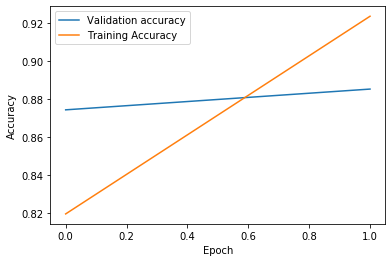

In [0]:
import matplotlib.pyplot as plt

ax1=plt.plot(log.history['val_acc'])
ax2=plt.plot(log.history['acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend((ax1[0],ax2[0]),('Validation accuracy','Training Accuracy'))
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
pred_test=model.predict_classes(x_test)
conf=confusion_matrix(y_test,pred_test)
print(conf)

[[11617   883]
 [ 1986 10514]]


In [0]:
model.evaluate(x_test,y_test)

25000/25000 [==============================] - 1s 46us/step


[0.27227842456817625, 0.88524]

In [0]:
from sklearn.naive_bayes import MultinomialNB

In [0]:
alpha=1.5
NB=MultinomialNB(alpha=alpha)
NB.fit(x_train,y_train)

NB.score(x_test,y_test)


0.50036

In [0]:
from sklearn.svm import LinearSVC

In [0]:
svc=LinearSVC()
svc.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
svc.score(x_test,y_test)

0.49612